J.P. Gonzalez-Aguilera<br>
January 2022

# Logistic map 

The logistic map is given by the difference equation:
\begin{equation}
    N_{t+1}=r N_t(1-N_t).
\end{equation}
Let's draw the Cobweb diagram for $r\in\{2,\ 2.5,\ 3,\ 3.25,\ 3.5,\ 3.57\}$.

In [1]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def nt1(r,n_t):
    return r*n_t*(1.0-n_t)
def web(r,n0,Nit):
    w = np.empty((Nit,2))
    w[0,0]=n0
    w[0,1]=0
    w[1,0]=n0
    w[1,1]=nt1(r, n0)
    for i in range(2,Nit-1,2):
        x=w[i-1,1]
        fx=nt1(r, x)
        w[i,0] = x
        w[i,1] = x
        w[i+1,0] = x
        w[i+1,1] = fx
    return w

In [13]:
x = np.linspace(0,1,1000)
Nit=100000
def update(r, n0):
    fig, ax = plt.subplots(1,2, sharey=True)
    ax[0].set_xlim([0,1])
    ax[0].set_ylim([0,1])
    ax[0].set_xlabel('$N_t$')
    ax[0].set_ylabel('$N_{t+1}$')
    ax[0].plot(x, nt1(r,x))
    ax[0].plot(x,x)
    #ax[0].set_aspect(1)
    w=web(r,n0,Nit)
    ax[0].plot(w[:,0],w[:,1],'g',linewidth=1)
    #ax[1] = ax[0].twiny()
    ax[1].plot(range(0,int(Nit/2)),w[::2,0])
    #ax[1].set_axis_off()
    ax[1].set_ylim([0,1])
    ax[1].set_xlim([0,32])
    ax[1].set_xlabel('$t$')
    #ax[1].set_aspect(10)
    plt.show()

interactive_plot = interactive(update, r=(2.00, 4.00,0.01), n0=(0.0,1.0,0.01))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0, min=2.0, step=0.01), FloatSlider(value=…

Text(0, 0.5, '$4/\\omega\\cdot df(\\phi)/d\\phi$')

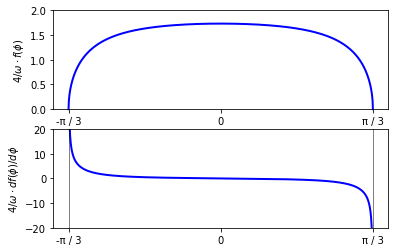

In [4]:
import matplotlib.ticker as tck
epsilon=np.pi/3/10
def f(phi):
    return np.sqrt(4-1/np.cos(phi)**2)
phi=np.linspace(-np.pi/3,np.pi/3,1000)
fig, (ax1,ax2) = plt.subplots(2,1)
line = ax1.plot(phi,f(phi), 'blue',linewidth=2)[0]
line.set_clip_on(False)
thetaticks=[-np.pi/3,0,np.pi/3]
ticks=['-π / 3','0','π / 3']
ax1.set_xticks(thetaticks,ticks)
ax1.set_xlim([-np.pi/3-epsilon,np.pi/3+epsilon])
ax1.set_ylim([0,2])
ax1.set_ylabel('$4/\omega\cdot f(\phi)$')
df=np.gradient(f(phi),phi)
ax2.plot(phi,df, 'blue',linewidth=2)
ax2.set_xticks(thetaticks,ticks)
ax2.set_xlim([-np.pi/3-epsilon,np.pi/3+epsilon])
ax2.axvline(-np.pi/3, color='black', linewidth=0.5)
ax2.axvline(+np.pi/3, color='black', linewidth=0.5)
ax2.set_ylim([-20,20])
ax2.set_ylabel('$4/\omega\cdot df(\phi)/d\phi$')